In [1]:
# インポート
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# 共通関数の定義
def getNumberOfWeeksAndDays(sdate, edate): # 対象日が起算日から見て何週目の何日目かを返す関数
  # 引数の日数差を計算
  dif_days_delta = edate - sdate # datetimeのtimedelta
  dif_days = dif_days_delta.days # int値

  # 7で割った商と余りを算出
  num_week, num_day = divmod(dif_days, 7.0)
  if num_day > 0:
    num_week = num_week + 1
  
  return num_week, num_day

In [3]:
# 定数定義
START_DAY = datetime.date(year=2020, month=1, day=19-1) # 計算起点日（後の週数計算のため18日を起点日に変更する）
END_DAY = datetime.date.today() # 本日の日付

In [4]:
# データの読み込み
data_src = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv')
data_src.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0


In [5]:
# 結果格納用リストの生成
## 計算起点週（2020-01-19週）から見て今日は何週目にあたるか
weekn, dayn = getNumberOfWeeksAndDays(START_DAY, END_DAY)

In [6]:
## 結果格納用のリストを準備
result = []

## 初期化されたリストを週数分準備
for i in range(int(weekn)):
  result.append([0, 0, 0, 0, 0, 0, 0])
result

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [7]:
# 入力データの整形（公表年月日ごとに件数カウント）
vc = data_src['公表_年月日'].value_counts()
df = pd.DataFrame(vc)
df = df.rename(columns={'公表_年月日': '発表件数'})
df

,発表件数
2020-08-01,472
2020-07-31,463
2020-08-07,462
2020-08-08,429
2020-07-30,367
...,...
2020-02-27,1
2020-02-13,1
2020-01-30,1
2020-01-25,1


In [8]:
# データのマッピング
for row in df.itertuples():
  # 入力行の日付と発表件数
  input_date_str = row[0] # 日付
  input_number_of_cases = row[1] # 発表件数

  # 入力行の日付（String）をDateに変換
  input_date_datetime = datetime.datetime.strptime(input_date_str, '%Y-%m-%d')
  input_date_date = datetime.date(input_date_datetime.year, input_date_datetime.month, input_date_datetime.day)

  # 入力行の日付が何週目の何日目にあたるか
  input_week_passed, input_day_passed = getNumberOfWeeksAndDays(START_DAY, input_date_date)
  # あまり0のときは7日目にあたるので数値補正
  if input_day_passed == 0:
    input_day_passed = 7

  # 結果格納リストにマッピング
  result[int(input_week_passed-1)][int(input_day_passed-1)] = input_number_of_cases

result

[[0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 8],
 [5, 0, 3, 3, 0, 3, 1],
 [0, 3, 0, 3, 1, 0, 1],
 [2, 0, 1, 4, 8, 6, 6],
 [0, 0, 3, 6, 2, 2, 10],
 [3, 0, 12, 9, 7, 11, 7],
 [3, 16, 18, 41, 46, 40, 64],
 [72, 12, 78, 67, 98, 92, 118],
 [141, 85, 87, 156, 183, 199, 198],
 [174, 100, 159, 127, 151, 206, 186],
 [109, 101, 123, 123, 134, 170, 119],
 [82, 41, 113, 47, 59, 165, 154],
 [93, 87, 57, 37, 23, 39, 36],
 [22, 15, 27, 10, 30, 9, 14],
 [5, 10, 5, 5, 11, 3, 2],
 [14, 8, 10, 11, 15, 21, 14],
 [5, 13, 34, 12, 28, 20, 26],
 [14, 13, 12, 18, 22, 25, 24],
 [47, 48, 27, 16, 41, 35, 39],
 [34, 29, 31, 55, 48, 54, 57],
 [60, 58, 54, 67, 107, 124, 131],
 [111, 102, 106, 75, 224, 243, 206],
 [206, 119, 143, 165, 286, 293, 290],
 [188, 168, 237, 238, 366, 260, 295],
 [239, 131, 266, 250, 367, 463, 472],
 [292, 258, 309, 263, 360, 462, 429],
 [331, 0, 0, 0, 0, 0, 0]]

In [9]:
# マッピングされたリストをデータフレームに
result_df = pd.DataFrame(result)

# 行名を変更
BASE_DATE = datetime.date(year=2020, month=1, day=19)
for row in result_df.itertuples():
  week_start_day = BASE_DATE + datetime.timedelta(days=row[0]*7)
  result_df=result_df.rename(index={int(row[0]): 'W: ' + str(week_start_day)})

# 列名を曜日に変更
result_df = result_df.rename(columns={0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

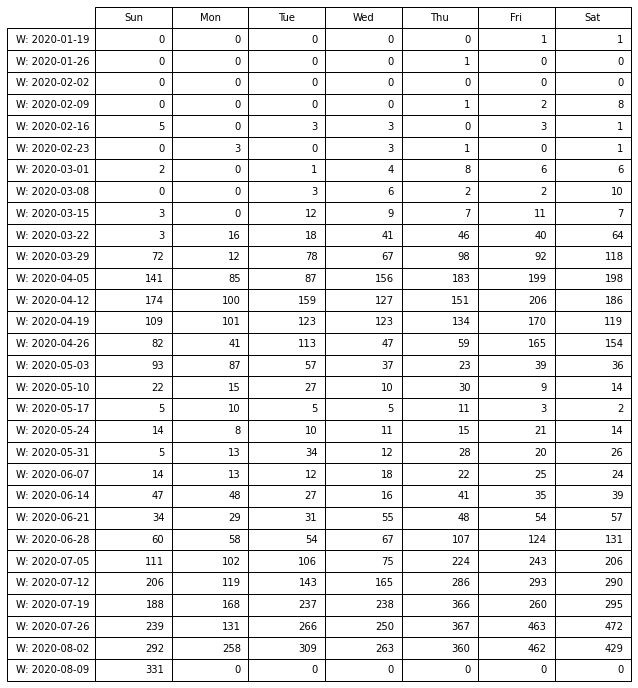

In [10]:
# 結果を画像として出力
fig,ax = plt.subplots(figsize=((len(result_df.columns)+1)*1.2, (len(result_df)+1)*0.4))
ax.axis('off')
tbl = ax.table(cellText=result_df.values,
               bbox=[0,0,1,1],
               colLabels=result_df.columns,
               rowLabels=result_df.index)
# plt.savefig('table.png') #PNG画像出力
plt.show() 